<a href="https://colab.research.google.com/github/TAUforPython/BaseControlTheory/blob/main/nonlinear%20phase%20picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# загружаем библиотеки
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Синица А.М.: Построение фазовых портретов на языке Python [Электронный ресурс] // Digiratory. 2017 г. URL: https://digiratory.ru/?p=435

In [212]:
#определяем статическую характеристику нелинейного элемента: трёхпозиционное реле с гистерезиом
def rele(xNL,dxNL,C,b,m):
    global yNL_prev
    yNL_prev = 0

    # Логика трехпозиционного реле с гистерезисом и учетом скорости
    if (xNL > b):
        yNL = C  # Верхнее положение
    elif (xNL < -b):
        yNL = -C  # Нижнее положение
    elif (xNL > m * b) and (yNL_prev == 0) and (dxNL >= 0):
        yNL = C  # Сохраняем верхнее положение в зоне гистерезиса при положительной скорости
    elif (xNL > m * b) and (yNL_prev == C) and (dxNL <= 0):
        yNL = C  # Сохраняем верхнее положение в зоне гистерезиса при положительной скорости

    elif (xNL < -m * b) and (yNL_prev == 0) and (dxNL <= 0):
        yNL = -C  # Сохраняем нижнее положение в зоне гистерезиса при отрицательной скорости
    elif (xNL < -m * b) and (yNL_prev == -C) and (dxNL >= 0):
        yNL = 0  # Сохраняем нижнее положение в зоне гистерезиса при отрицательной скорости
    else:
        yNL = 0  # Нейтральное положение

    yNL_prev = yNL  # Обновляем предыдущее состояние
    return yNL
C = 1
b = 0.5
m = 0.5

In [9]:
#определяем статическую характеристику нелинейного элемента: трехпозиционное реле
def rele(xNL,dxNL,C,b,m):
  if (xNL > b):
    yNL = C
  elif (xNL < -b):
    yNL = -C
  else:
    yNL = 0
  return yNL

C = 1
b = 0.5
m = 0

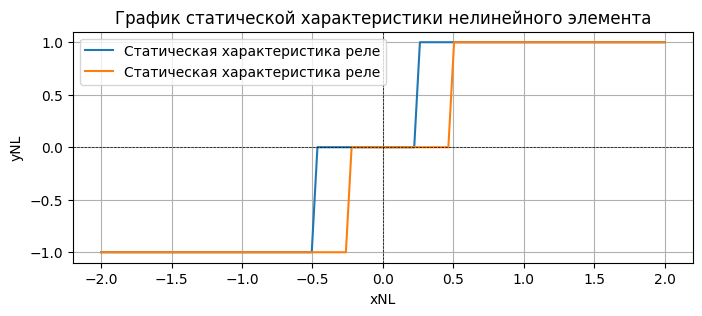

In [213]:
# Создаем массив значений xNL
xNL_values = np.linspace(-2, 2, 100)
dxNL = 1.0  # Предположим, что производная постоянна

# Вычисляем значения yNL для каждого xNL
# Строим график
plt.figure(figsize=(8, 3))

yNL_values = [rele(xNL, dxNL, C, b, m) for xNL in xNL_values]
plt.plot(xNL_values, yNL_values, label='Статическая характеристика реле')

yNL_values = [rele(xNL, -dxNL, C, b, m) for xNL in xNL_values]
plt.plot(xNL_values, yNL_values, label='Статическая характеристика реле')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('xNL')
plt.ylabel('yNL')
plt.title('График статической характеристики нелинейного элемента')
plt.legend()
plt.grid(True)
plt.show()

In [207]:
# пример 1. задаем систему дифференциальных уравнений в форме Коши

def ode(y, t, b, c):
        theta, omega = y
        dydt = [omega, -b * omega - c * np.sin(theta)]
        return dydt

In [341]:
# пример 2. задаем систему дифференциальных уравнений в форме Коши
def ode(y, t, b, c):
        theta, omega = y
        dydt = [omega, -b * omega  - c * theta - (+0.1*theta + 0.5*omega +1)*rele(theta, omega, 1, 0.5, 0.5)]
        return dydt

In [342]:
#задаем функцию численного решения дифференциального уравнения
def calcODE(args, y0, dy0, ts, nt):
    y0 = [y0, dy0]
    t = np.linspace(0, ts, nt)
    sol = odeint(ode, y0, t, args)
    return sol

In [343]:
#задаем функцию отрисовки фазового портрета в зависимости от начальных условий
def drawPhasePortrait(args, deltaX, deltaDX, startX, stopX, startDX, stopDX, ts, nt):

    plt.figure(figsize=(8,8))
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[0, 0], sol[0, 1],'bo', sol[:, 0], sol[:, 1])
    plt.xlabel('x = $x_1$')
    plt.ylabel('dx/dt = $x_2$')
    plt.grid()
    plt.show()

<ipython-input-342-4f6adeb15111>:5: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(ode, y0, t, args)


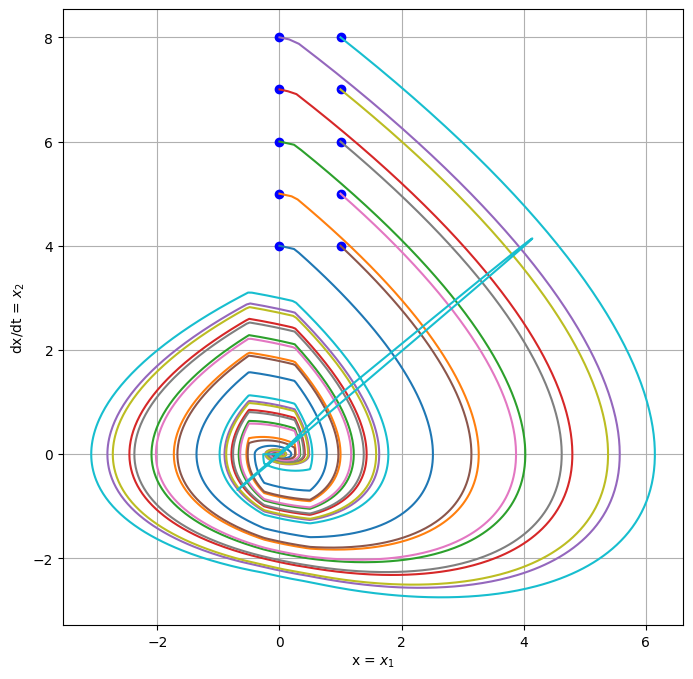

In [344]:
#задаем параметры системы и начальные условия
b = 0.25
c = 0.3
args=(b, c)

drawPhasePortrait(args, 1, 1, 0, 2, 4, 9, ts = 40, nt = 2000)

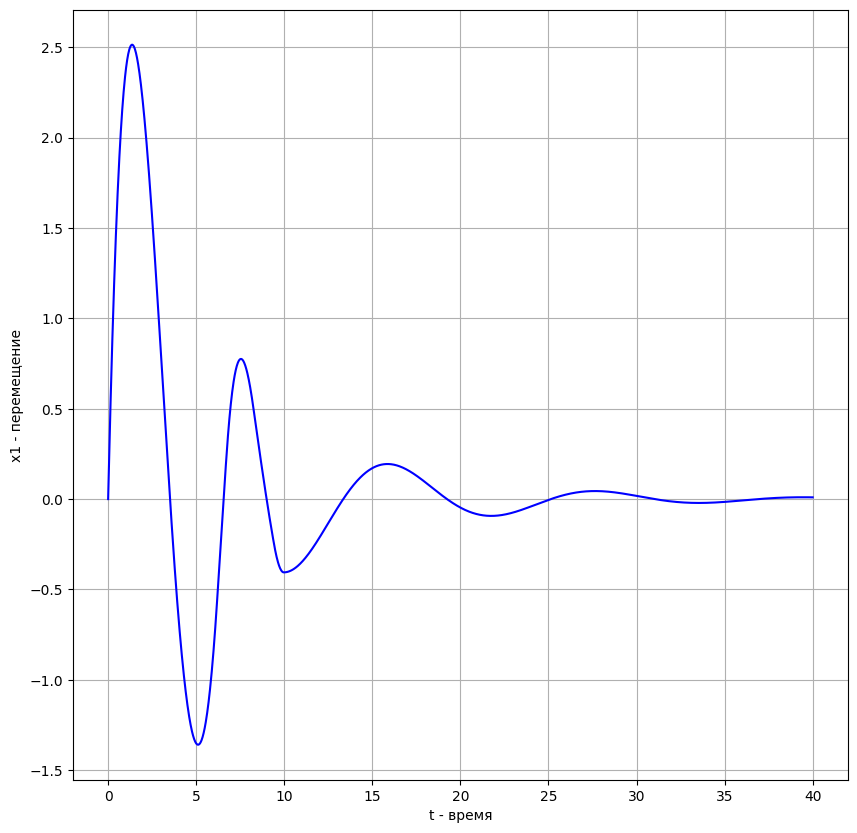

In [345]:
sol = calcODE(args, y0 = 0, dy0 = 4, ts = 40, nt = 2000)
t = np.linspace(0, 40, 2000)
plt.figure(figsize=(10,10))
plt.xlabel('t - время')
plt.ylabel('x1 - перемещение')
plt.plot(t, sol[:, 0], 'b')
plt.grid()
plt.show()